<a href="https://colab.research.google.com/github/stefanogiagu/corso_AML_2024/blob/main/notebooks/es1/soda_can.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# soda can problem
V0 = 330
SoverV0 = lambda r: 2/r + (2*np.pi * r **2) / V0

In [ ]:
SoverV0(1)

2.019039955476302

In [ ]:
r = np.linspace(0.2,20,300)

In [ ]:
y = SoverV0(r)

Text(0, 0.5, 'Surface Volume ratio (cm^-1)')

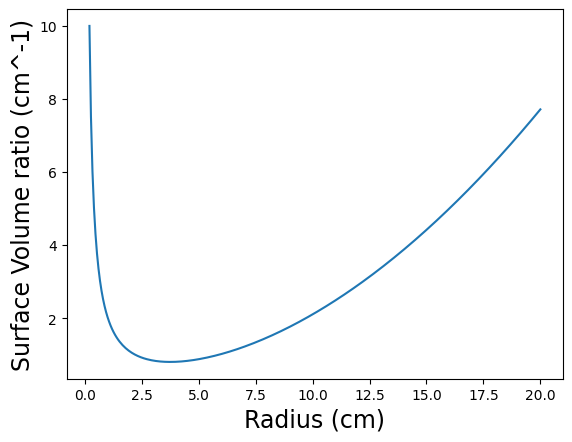

In [ ]:
plt.plot(r,y)
plt.xlabel("Radius (cm)" , fontsize =17)
plt.ylabel("Surface Volume ratio (cm^-1)", fontsize =17)

In [ ]:
import torch.nn as nn

class SodaCan(nn.Module):
    def __init__(self, V0, lr=0.01):
        super(SodaCan, self).__init__()
        self.V0 = V0

        self.pi = torch.torch.acos(torch.zeros(1))*2 # no pi in torch :(

        self.R = torch.Tensor([20])#initialized to 10
        self.R.requires_grad = True# this is our variable (parameter of the model), gradients are turned ON

        self.lr = torch.Tensor([lr])
        self.lr.requires_grad = False # this is a constant, gradients are turned OFF


    def forward(self):
        # Forward pass

        SoverV = 2/self.R + 2*self.pi * self.R **2 / self.V0

        return SoverV

    def Do_a_step(self):

      gradSov  = torch.autograd.grad(self(), self.R)


      self.R = self.R - self.lr*gradSov[0]

      return self.R.item(), gradSov[0].item(),self().item()

In [ ]:
sOv = SodaCan(V0=330,lr = 0.5)

In [ ]:
R = []
value=[]
for epoch in range(400):
  newR,_,f_in_R = sOv.Do_a_step()
  R.append(newR)
  value.append(f_in_R)

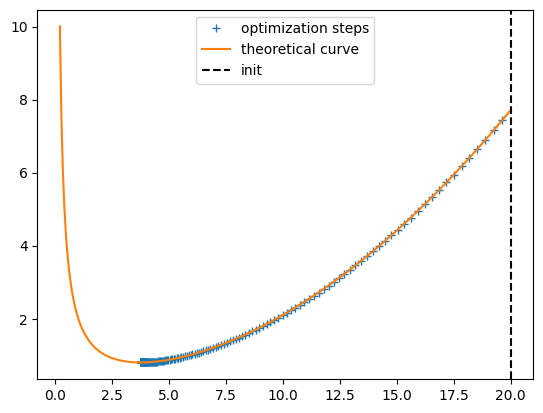

In [ ]:
plt.plot(R,value,"+",label= "optimization steps")
plt.plot(r,y,label= "theoretical curve")
plt.axvline(20,linestyle="--",label="init",color="k")
plt.legend()